In [8]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
pd.set_option('display.max_columns', 30)
dados = load_breast_cancer()
X = pd.DataFrame(dados.data, columns = dados.feature_names)
Y = pd.Series(dados.target)

In [9]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
print(Y.shape, X.shape)

(569,) (569, 30)


In [11]:
Y.value_counts()

1    357
0    212
Name: count, dtype: int64

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.3, random_state=9)

modelo = LogisticRegression(C=95)
modelo.fit(X_treino, Y_treino)

resultado = modelo.score(X_teste, Y_teste)

resultado

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9532163742690059

In [16]:
predicoes = modelo.predict_proba(X_teste)
predicoes

array([[5.10729925e-02, 9.48927008e-01],
       [4.62654260e-01, 5.37345740e-01],
       [1.00000000e+00, 7.62987547e-12],
       [2.60647069e-02, 9.73935293e-01],
       [1.05976188e-03, 9.98940238e-01],
       [1.00000000e+00, 6.64935427e-14],
       [1.00000000e+00, 2.15239554e-13],
       [9.99999716e-01, 2.84218082e-07],
       [6.14405234e-03, 9.93855948e-01],
       [9.99980209e-01, 1.97912137e-05],
       [1.00000000e+00, 2.76872711e-11],
       [3.41696413e-03, 9.96583036e-01],
       [4.14799607e-04, 9.99585200e-01],
       [2.15417946e-03, 9.97845821e-01],
       [9.89831244e-01, 1.01687558e-02],
       [3.89561901e-02, 9.61043810e-01],
       [2.53957519e-04, 9.99746042e-01],
       [3.52753430e-02, 9.64724657e-01],
       [4.03792397e-05, 9.99959621e-01],
       [3.28467435e-04, 9.99671533e-01],
       [1.00000000e+00, 3.59163384e-32],
       [3.12523740e-04, 9.99687476e-01],
       [3.86054260e-03, 9.96139457e-01],
       [9.99999318e-01, 6.82131268e-07],
       [3.975960

In [20]:
probs = predicoes[:, 1]

In [24]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_teste, probs)

print('TPR', tpr)
print('FPR', fpr)
print('Thresholds', thresholds)

TPR [0.         0.00917431 0.87155963 0.87155963 0.91743119 0.91743119
 0.97247706 0.97247706 0.98165138 0.98165138 0.99082569 0.99082569
 1.         1.        ]
FPR [0.         0.         0.         0.01612903 0.01612903 0.03225806
 0.03225806 0.08064516 0.08064516 0.12903226 0.12903226 0.16129032
 0.16129032 1.        ]
Thresholds [           inf 9.99992790e-01 9.66998375e-01 9.66980221e-01
 9.49565108e-01 9.48927008e-01 8.14058988e-01 5.35425823e-01
 4.84433055e-01 2.80129585e-01 2.58270344e-01 2.29052916e-01
 1.71677571e-01 9.82132066e-39]


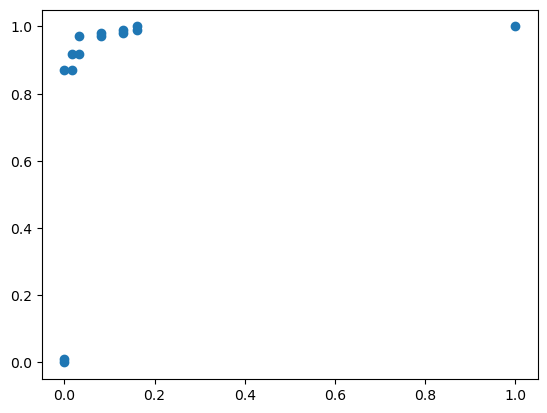

In [25]:
import matplotlib.pyplot as plt
plt.scatter(fpr, tpr)
plt.show()

In [28]:
from sklearn.metrics import roc_auc_score 
print(roc_auc_score(Y_teste, probs))

0.9940810890796093
